In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_csv('../data/insurance.csv')

<Axes: >

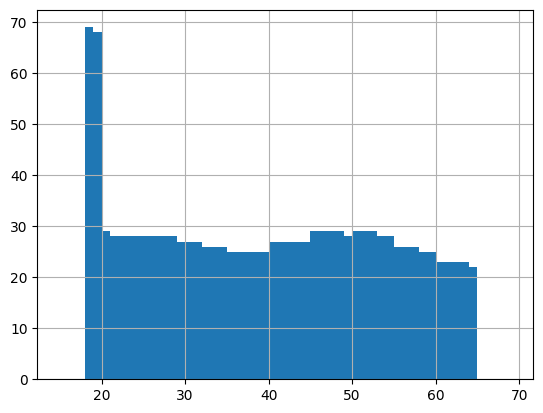

In [19]:
df['age'].hist(bins=np.arange(15,70,1))

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: >

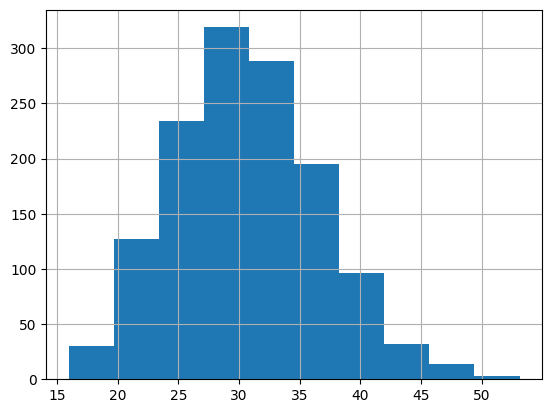

In [20]:
df['bmi'].hist()

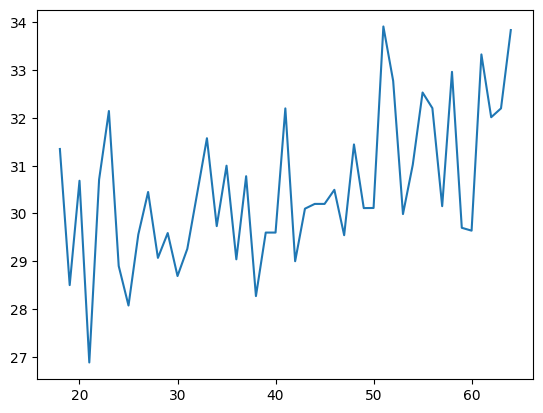

In [24]:
age_groups=df['bmi'].groupby(df['age']).median()
plt.plot(age_groups)

In [34]:
region_encode=pd.get_dummies(df['region'], prefix='region')*1
pd.concat([df, region_encode], axis=1)

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,1


In [39]:
categorical_features = ['sex','smoker','region']
categorical_transformer = Pipeline(steps=[
    ('labelencode', LabelEncoder())])

In [ ]:
ct = ColumnTransformer(transformers = [])

In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

In [46]:
ct = ColumnTransformer(transformers = [('lab_col1',LabelEncoder(),[1]),
                                     ('lab_col2',LabelEncoder(),[4]),
                                     ('lab_col3',LabelEncoder(),[5])])

In [48]:
df2 = ct.fit(df)

TypeError: fit_transform() takes 2 positional arguments but 3 were given